<a href="https://colab.research.google.com/github/appiahs5/Calculator/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols


In [ ]:
pip install ydata-profiling==4.1.2

In [ ]:
import ydata_profiling

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-3-61ce4db7f14c>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
#Loading csv dataset file

In [5]:
df = pd.read_csv('/content/Annual_Surface_Temperature_Change.csv')

In [ ]:
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [ ]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [ ]:
print(df.head())

   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of t

In [ ]:
print(df.isnull().sum())

ObjectId      0
Country       0
ISO2          2
ISO3          0
Indicator     0
             ..
F2018        12
F2019        12
F2020        13
F2021        12
F2022        12
Length: 72, dtype: int64


In [ ]:
print(df.columns)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')


In [ ]:
# Handle missing values (if any)

In [ ]:
df = df.fillna(method="ffill")

In [ ]:
# Isolate temperature change values for analysis

In [ ]:
temperature_changes = df.iloc[:, 6:]

In [ ]:
# Visualize distribution of temperature changes

In [ ]:
plt.style.use('seaborn')



<ipython-input-20-f0627afadaf8>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


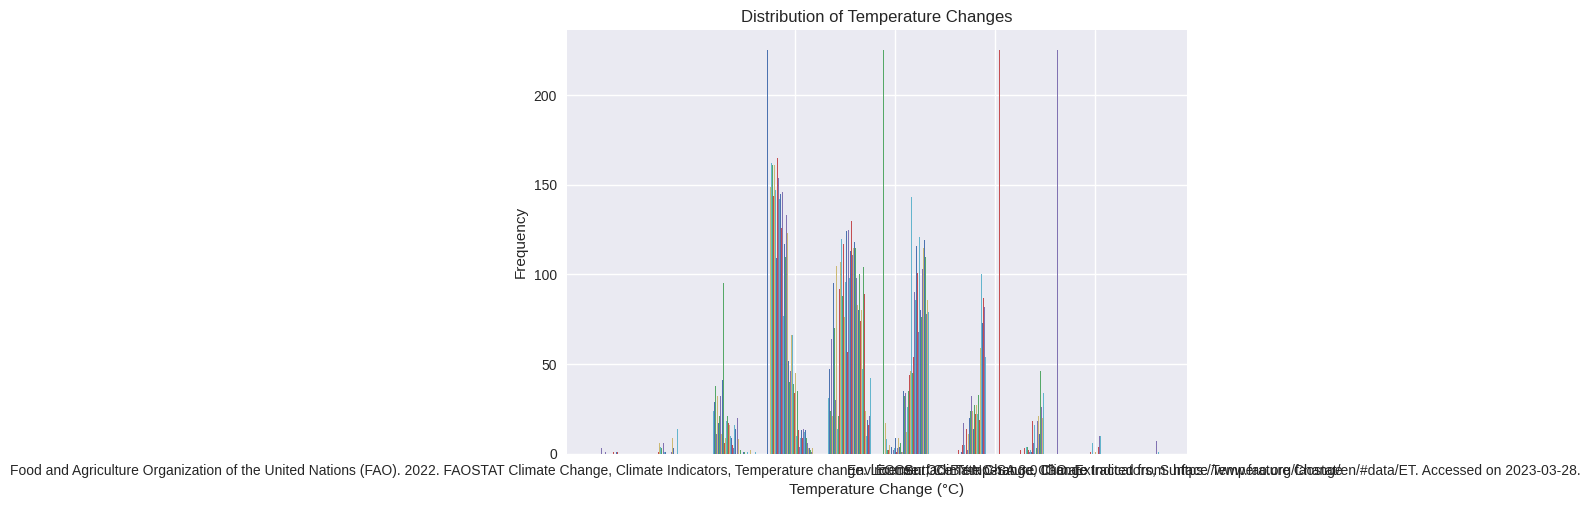

In [ ]:
plt.hist(temperature_changes)  # Remove `.values.flatten()`
plt.xlabel("Temperature Change (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Changes")
plt.show()

In [ ]:
# Apply Gaussian mixture model

In [ ]:
print(df.columns)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')


In [ ]:
data = pd.read_csv("/content/Annual_Surface_Temperature_Change.csv")  # Replace with your file path


<AxesSubplot: ylabel='Density'>

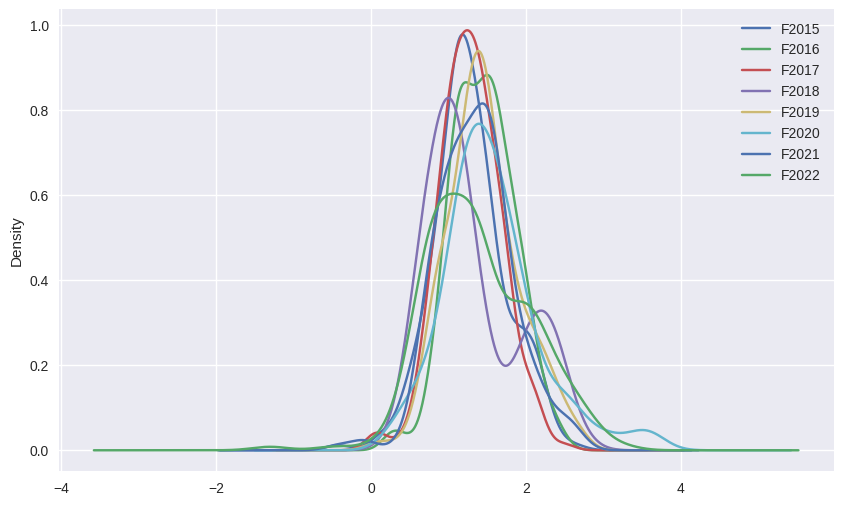

In [ ]:
# Create the density plots
data[years].plot(kind="density", figsize=(10, 6))

In [ ]:
# Apply Gaussian mixture model
temperature_changes = data.iloc[:, 6:].loc[:, "F2015":"F2022"]

In [ ]:
n_components_list = [2, 3, 4]


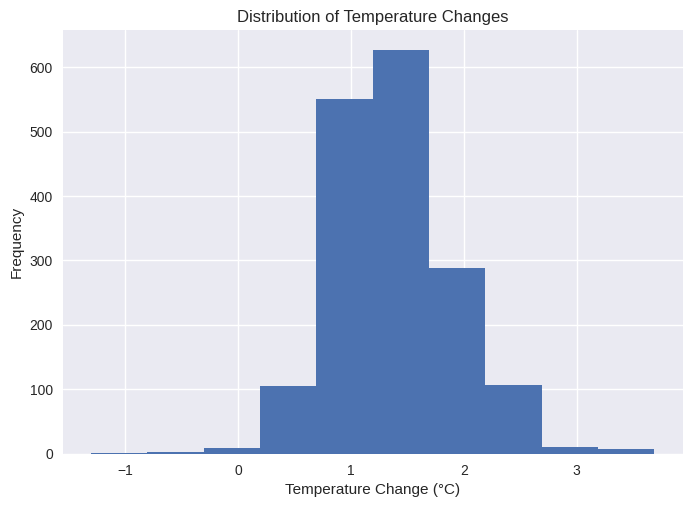

In [ ]:
plt.hist(temperature_changes.values.flatten())
plt.xlabel("Temperature Change (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Changes")
plt.show()



In [ ]:

temperature_changes = data.loc[:, "F2015":"F2022"].apply(pd.to_numeric, errors='coerce')
temperature_changes.dropna(inplace=True)  # Drop rows with missing values after conversion


In [ ]:
n_components_list = [2, 3, 4]


In [ ]:
# Loop through different number of components and evaluate the GMM
for n_components in n_components_list:
    # Create and fit the GMM
    gmm = GaussianMixture(n_components=n_components, covariance_type="full")
    gmm.fit(temperature_changes)


In [ ]:
bic = gmm.bic(temperature_changes)


In [ ]:
# Analyze model results
labels = gmm.predict(temperature_changes)
print("Cluster labels:", labels)

Cluster labels: [1 3 0 1 3 1 1 1 1 3 1 3 3 1 3 1 3 3 1 1 1 2 3 1 1 1 1 3 1 1 1 2 2 1 2 1 2
 2 1 1 1 1 1 1 3 2 2 3 3 1 1 2 1 2 1 1 3 1 1 1 1 3 3 1 1 1 3 3 1 0 2 2 1 1
 1 1 1 2 2 3 1 3 1 1 1 3 3 1 1 2 3 1 1 2 0 2 2 1 3 0 1 3 2 1 1 2 3 3 3 1 1
 1 1 1 0 1 1 0 1 1 1 1 3 3 3 3 1 0 1 2 1 1 3 0 1 1 1 1 1 3 0 1 1 1 1 2 1 1
 3 0 1 3 3 3 1 1 1 3 1 3 1 3 1 1 1 3 3 2 1 1 0 1 1 1 1 1 1 3 3 2 1 3 1 1 1
 1 1 1 0 0 1 1 3 1 1 2 1 1 0 1 1 1 1 2 0 1 1 1]


In [ ]:
# Separate data by cluster
cluster_1_data = temperature_changes[labels == 0]
cluster_2_data = temperature_changes[labels == 1]

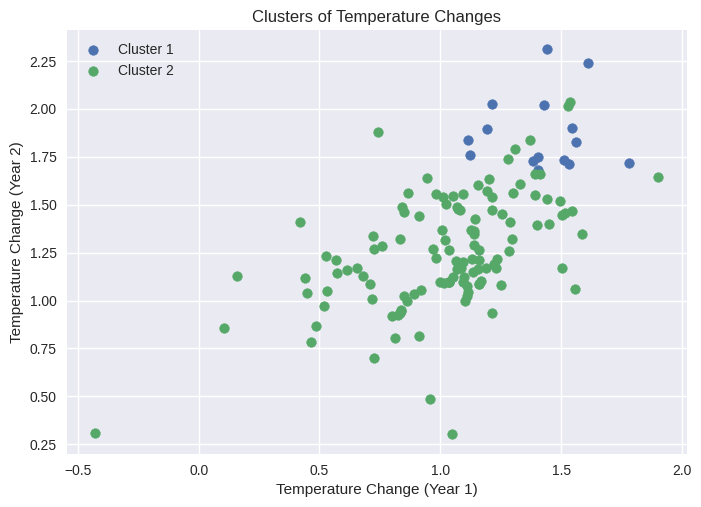

In [ ]:
# Visualize clusters
plt.scatter(cluster_1_data.iloc[:, 0], cluster_1_data.iloc[:, 1], label="Cluster 1")
plt.scatter(cluster_2_data.iloc[:, 0], cluster_2_data.iloc[:, 1], label="Cluster 2")
plt.xlabel("Temperature Change (Year 1)")
plt.ylabel("Temperature Change (Year 2)")
plt.title("Clusters of Temperature Changes")
plt.legend()
plt.show()

In [9]:
data = pd.read_csv("Annual_Surface_Temperature_Change.csv")


In [13]:
print(df.head())




   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of t

In [14]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [16]:
data["F2011_lag1"] = data["F2011"].shift(1)  # Lag of 1 year
data["F2022_lag2"] = data["F2022"].shift(2)  # Lag of 2 years



In [18]:
# Define the regression model formula
model = ols("F2011 ~ F2011_lag1 + F2022_lag2", data=data).fit()

In [19]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  F2011   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1310
Date:                Fri, 26 Jan 2024   Prob (F-statistic):              0.877
Time:                        12:40:07   Log-Likelihood:                -93.443
No. Observations:                 195   AIC:                             192.9
Df Residuals:                     192   BIC:                             202.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8261      0.091      9.115      0.0

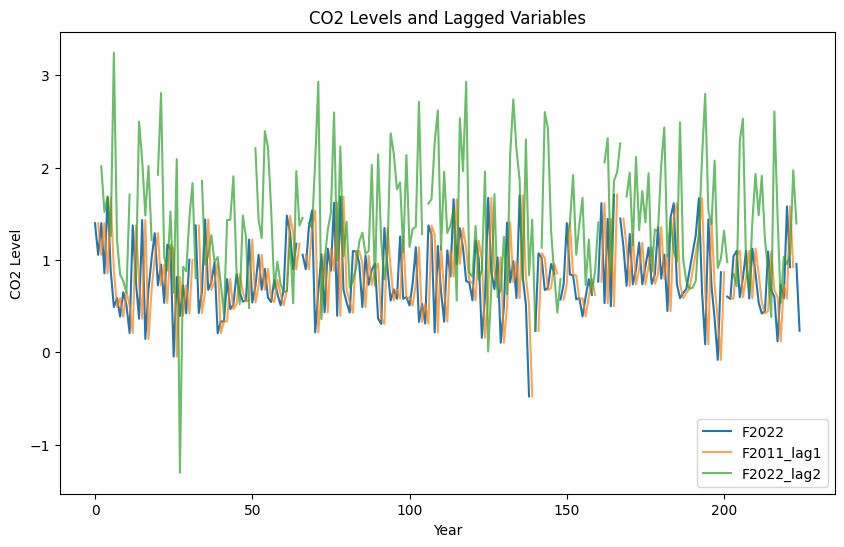

In [20]:
# Visualize the relationship between CO2 and lagged CO2
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["F2011"], label="F2022")
plt.plot(data.index, data["F2011_lag1"], label="F2011_lag1", alpha=0.7)
plt.plot(data.index, data["F2022_lag2"], label="F2022_lag2", alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.title("CO2 Levels and Lagged Variables")
plt.show()